In [1]:
library(stm)


stm v1.3.3 () successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


In [2]:
# poliblogs<-read.csv("/Users/ninawang/Thesis/remote/THESIS2019/file_transfer/leftright2012.csv",header=TRUE)
poliblogs<-read.csv("/Users/ninawang/Thesis/remote/THESIS2019/PART1/TopicModel/STM/stm_data.csv",header=TRUE)



In [3]:
processed <- textProcessor(poliblogs$documents, metadata = poliblogs)

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 


In [4]:
out <- prepDocuments(processed$documents, processed$vocab, processed$meta)


Removing 4994 of 28338 terms (4994 of 1514008 tokens) due to frequency 
Your corpus now has 6381 documents, 23344 terms and 1509014 tokens.

In [5]:
docs <- out$documents
vocab <- out$vocab
meta <-out$meta

In [6]:
First_STM <- stm(documents = out$documents, vocab = out$vocab,
              K = 30, prevalence =~ rating,
              max.em.its = 75, data = out$meta,
              init.type = "Spectral", verbose = FALSE)

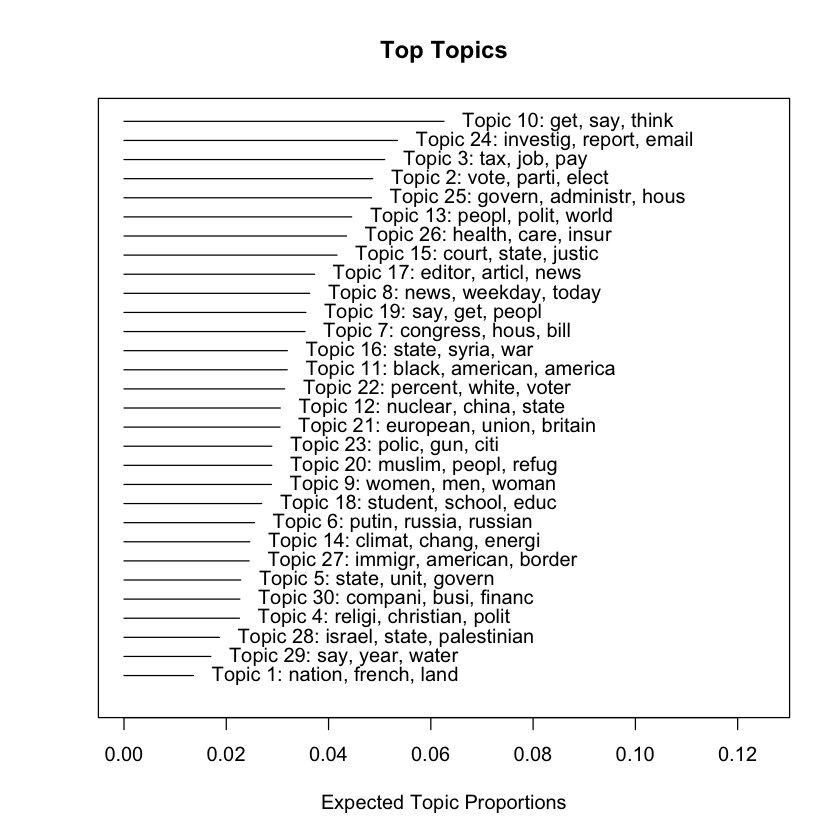

In [7]:
plot(First_STM)

In [31]:
pdf("rplot.pdf") 
plt = plot(First_STM)
dev.off()

pdf 
  2

In [9]:
# interesting measure - we can view documents that have a high 
# representation of a certain topic

findThoughts(First_STM, texts = poliblogs$documents,
     n = 2, topics = 3)

summary(First_STM, topics=3)

Warning message in findThoughts(First_STM, texts = poliblogs$documents, n = 2, topics = 3):
“texts are of type 'factor.'  Converting to character vectors.  Use 'as.character' to avoid this warning in the future.”


 Topic 3: 
 	 photo agre nation road bridg infrastructur need expens overhaul voter assum candid equal capabl deliv result abil carri plan repair project cost hundr billion dollar depend plan mesh administr tax spend propos infrastructur overhaul do isol approach shoot good approach fiscal unten call spend infrastructur year plan small meet nation need american societi civil engin estim need repair run trillion dollar propos initi spend propel futur invest money use establish feder infrastructur bank provid financ loan guarante loan public project also say plan pay revenu gener reform busi tax yet detail reform propos theori plan avoid add feder deficit congress demand recent year contrast say simpli borrow sever dollar least doubl amount propos spend right borrow invest infrastructur make sens interest rat low combin plan propos borrow sever fiscal damag starter centerpiec econom plan huge tax cut wealthi propos cut reduc revenu year accord preliminari analysi plan latest version tax

A topic model with 30 topics, 6381 documents and a 23344 word dictionary.


Topic 1 Top Words:
 	 Highest Prob: nation, french, land, franc, park, pen, monument 
 	 FREX: macron, french, monument, sarkozi, canyon, acr, emmanuel 
 	 Lift: acadia, adiarat, alastair, algier, ambienc, anis, artistri 
 	 Score: macron, french, pen, fillon, franc, monument, acr 
Topic 2 Top Words:
 	 Highest Prob: vote, parti, elect, voter, candid, support, campaign 
 	 FREX: vote, elector, ballot, candid, primari, voter, poll 
 	 Lift: levitski, ziblatt, abramson, ajamu, alberga, alyson, aquinnah 
 	 Score: vote, voter, elector, parti, candid, stein, poll 
Topic 3 Top Words:
 	 Highest Prob: tax, job, pay, percent, econom, cut, economi 
 	 FREX: tax, growth, worker, deficit, incom, wage, rate 
 	 Lift: bjelland, depot, hyperglob, inflationari, leviathan, mcgarrahan, mishel 
 	 Score: tax, growth, deficit, economi, incom, budget, percent 
Topic 4 Top Words:
 	 Highest Prob: religi, christian, polit, right, church, cathol, evangel 
 	 FREX: yiannopoulo, falwel, cathol, christian, eva

In [51]:

capture.output(summary(First_STM), file="s1.txt", append=FALSE)


In [10]:
# https://www.rdocumentation.org/packages/stm/versions/1.3.3/topics/estimateEffect

predict_topics<-estimateEffect(formula = ~ rating, stmobj = First_STM, metadata = out$meta, uncertainty = "Global")



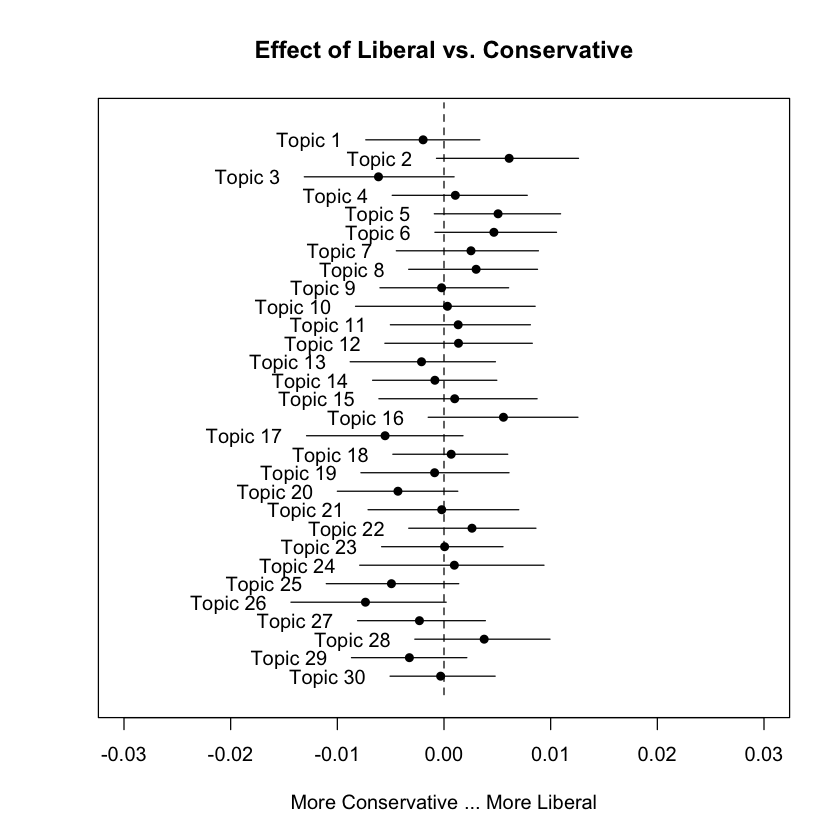

In [11]:
plot(predict_topics, covariate = "rating", topics = 1:30,
 model = First_STM, method = "difference",
 cov.value1 = "left", cov.value2 = "right",
 xlab = "More Conservative ... More Liberal",
 main = "Effect of Liberal vs. Conservative",
 xlim = c(-.03, .03), labeltype = "custom",
 custom.labels = paste("Topic",1:30))

In [17]:
labelTopics(First_STM, topics=28)
summary(predict_topics, topics=28)

# FREX: are the words that are both frequent and exclusive, identifying 
# words that distinguish topics. This is calculated by taking the harmonic 
# mean of rank by probability within the topic (frequency) and rank by 
# distribution of topic given word p(z|w=v) (exclusivity). In estimating 
# exclusivity we use a James-Stein type shrinkage estimator of the 
# distribution p(z|w=v). 
# https://rdrr.io/cran/stm/man/labelTopics.html

Topic 28 Top Words:
 	 Highest Prob: israel, state, palestinian, saudi, isra, american, unit 
 	 FREX: israel, palestinian, isra, netanyahu, jerusalem, sisi, palestin 
 	 Lift: hayom, odeh, yair, isra, jerusalem, mustafa, netanyahu 
 	 Score: israel, palestinian, isra, netanyahu, saudi, jerusalem, arabia 


Call:
estimateEffect(formula = ~rating, stmobj = First_STM, metadata = out$meta, 
    uncertainty = "Global")


Topic 28:

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.022828   0.002344   9.737   <2e-16 ***
ratingright -0.003770   0.003159  -1.193    0.233    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


ERROR: Error in plot.window(...): need finite 'xlim' values


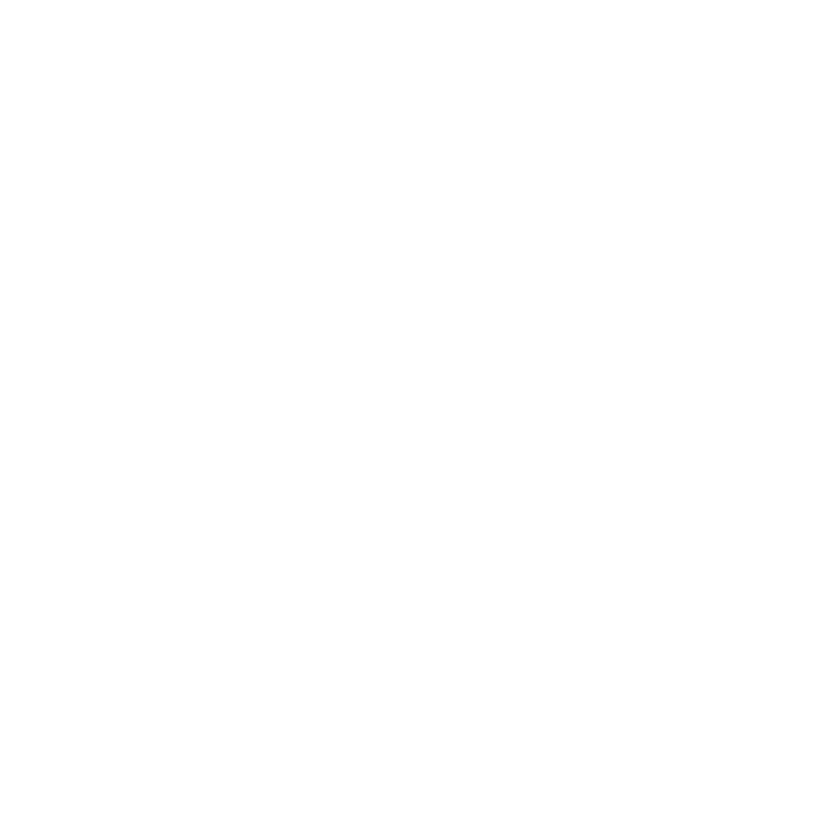

In [192]:
plot(First_STM, type = "perspectives", topics = 11)

In [18]:
summ = summary(predict_topics)
summ[3]

typeof(table(summ[3]))
s = summ[3]
s[[3]]

# dta <- read.table(s,head=True)


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.015198487,0.001924969,7.8954465,3.381629e-15
ratingright,0.001970318,0.002666359,0.7389544,4.599619e-01
,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.047777685,0.002481306,19.255055,2.357009e-80
ratingright,-0.006122772,0.003330385,-1.838458,6.604146e-02
,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.043508476,0.00296294,14.684226,4.915530e-48
ratingright,0.006129967,0.00357065,1.716765,8.607063e-02
,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.025319426,0.002494786,10.1489355,5.095147e-24


ERROR: Error in order(y): unimplemented type 'list' in 'orderVector1'



In [19]:
summ$tables[[1]]
summ$tables[[1]][8]

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.015198487,0.001924969,7.8954465,3.381629e-15
ratingright,0.001970318,0.002666359,0.7389544,4.599619e-01


[1] 0.4599619

In [20]:
est <- predict_topics

coef <- se <- pval <- rep(NA, 30)
for (i in 1:30){
    coef[i] <- est$parameters[[i]][[1]]$est[2]
    se[i] <- est$parameters[[i]][[1]]$vcov[2,2]
    pval[i] <- summ$tables[[i]][8]
}

df <- data.frame(topic = 1:30, coef=coef, se=se, pval=pval)
df <- df[order(df$coef),] # sorting by "partisanship"
df[order(df$coef),]

,topic,coef,se,pval
16,16,-6.069059e-03,9.764218e-06,0.12243587
21,21,-4.872865e-03,8.568492e-06,0.96013879
6,6,-4.484443e-03,5.954202e-06,0.11283018
22,22,-4.310795e-03,7.354753e-06,0.39546471
5,5,-3.607103e-03,7.856719e-06,0.10379095
11,11,-2.484891e-03,8.355721e-06,0.66681482
7,7,-2.424998e-03,8.145206e-06,0.45077627
10,10,-2.241781e-03,1.002813e-05,0.93311780
4,4,-1.846771e-03,6.734084e-06,0.72332763
28,28,-1.700522e-03,6.903054e-06,0.22833852


In [122]:
df[1,]

,topic,coef,se,pval
30,30,-0.07439625,4.869626e-06,7.560578e-161


In [21]:
# write to csv
write.csv(df, file = "MyData.csv")

In [ ]:
#
#
# LOOKING AT THE TIME COVARIATE
#
#

Warning message in splines::bs(x, df, ...):
“'df' was too small; have used 3”

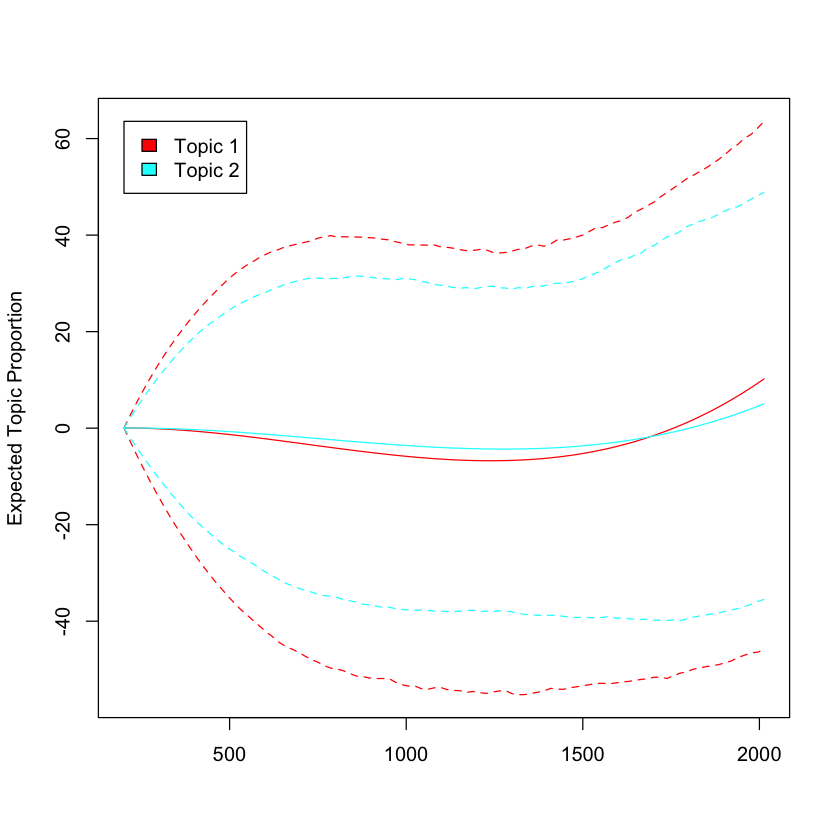

In [149]:
First_STM <- stm(documents = out$documents, vocab = out$vocab,
              K = 30, prevalence =~ rating,
              max.em.its = 75, data = out$meta,
              init.type = "Spectral", verbose = FALSE)

In [181]:
time <- estimateEffect(~s(date)+rating, 
    First_STM, uncertainty = "None", meta=meta)


Warning message in splines::bs(x, df, ...):
“'df' was too small; have used 3”Warning message in splines::bs(x, df, ...):
“'df' was too small; have used 3”Warning message in estimateEffect(~s(date) + rating, First_STM, uncertainty = "None", :
“Covariate matrix is singular.  See the details of ?estimateEffect() for some common causes.
             Adding a small prior 1e-5 for numerical stability.”

Warning message in splines::bs(x, df, ...):
“'df' was too small; have used 3”

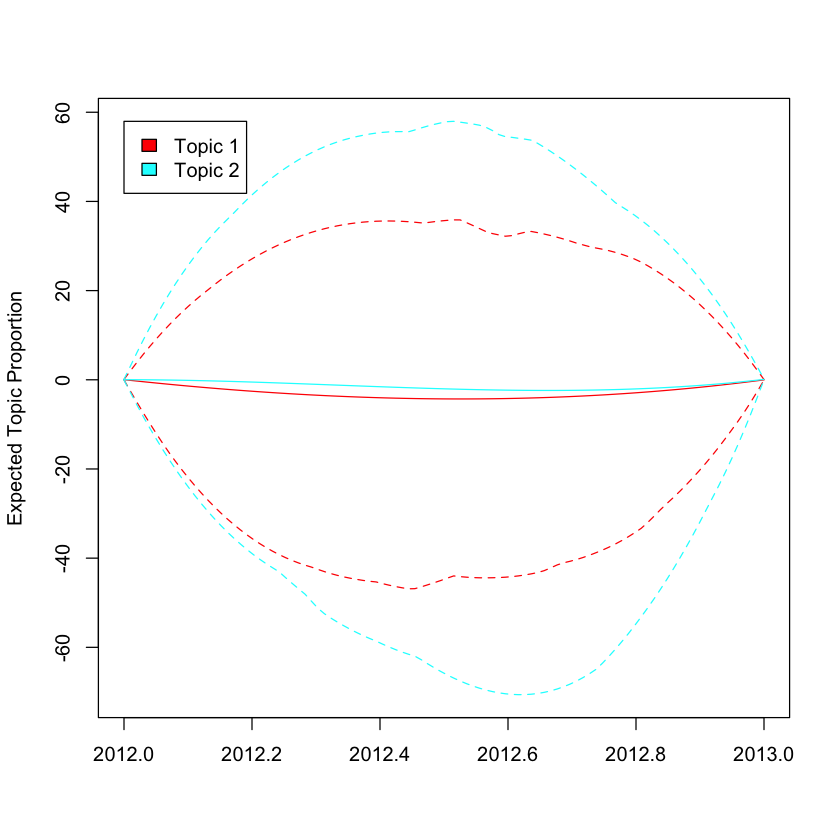

In [182]:
plot(time, "date", method="continuous", topics=1:2)